# Basic regression: Predict Household Electricity consumption

In a *regression* problem, the aim is to predict the output of a continuous value, like electricity consumption in kilowatt per hour(kwh). Contrast this with a *classification* problem, where the aim is to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).



In [34]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import pickle


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

## The Household Electricity Consumption

The dataset is available from the [kaggle.com](https://www.kaggle.com/datasets/thedevastator/240000-household-electricity-consumption-records/data).


### Get the data
First download and import the dataset using pandas:

In [3]:
df_dataset = pd.read_csv('C:\MyCoding\Project\household_power_consumption.csv')
df = df_dataset.copy()
df.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


## Data Preparation

In [4]:
# Rename the columns using the rename() method
df = df.rename(columns={'index': 'Index', 'Date': 'Date', 'Time': 'Time', 'Global_active_power': 'Active_Power', 'Global_reactive_power': 'Reactive_Power', 'Voltage': 'Voltage', 'Global_intensity': 'Intensity','Sub_metering_1': 'Kitchen', 'Sub_metering_2': 'Laundry_Room', 'Sub_metering_3': 'Heater_AC' })
print(df.head())

   Index    Date     Time Active_Power Reactive_Power Voltage Intensity  \
0      0  1/1/07  0:00:00         2.58          0.136  241.97      10.6   
1      1  1/1/07  0:01:00        2.552            0.1  241.75      10.4   
2      2  1/1/07  0:02:00         2.55            0.1  241.64      10.4   
3      3  1/1/07  0:03:00         2.55            0.1  241.71      10.4   
4      4  1/1/07  0:04:00        2.554            0.1  241.98      10.4   

  Kitchen Laundry_Room  Heater_AC  
0       0            0        0.0  
1       0            0        0.0  
2       0            0        0.0  
3       0            0        0.0  
4       0            0        0.0  


In [5]:
#To check Dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Index           260640 non-null  int64  
 1   Date            260640 non-null  object 
 2   Time            260640 non-null  object 
 3   Active_Power    260640 non-null  object 
 4   Reactive_Power  260640 non-null  object 
 5   Voltage         260640 non-null  object 
 6   Intensity       260640 non-null  object 
 7   Kitchen         260640 non-null  object 
 8   Laundry_Room    260640 non-null  object 
 9   Heater_AC       256869 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 19.9+ MB


In [29]:
#To find the number of rows and columns
df.shape

(260640, 10)

## Data Cleaning and Preprocessing

In [44]:
# Convert data types
#df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df['Date'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df[['Active_Power', 'Date', 'Kitchen', 'Laundry_Room', 'Heater_AC', 'Reactive_Power', 'Voltage', 'Intensity']]
df['Active_Power'] = pd.to_numeric(df['Active_Power'], errors='coerce')
df['Kitchen'] = pd.to_numeric(df['Kitchen'], errors='coerce')
df['Laundry_Room'] = pd.to_numeric(df['Laundry_Room'], errors='coerce')
df['Heater_AC'] = pd.to_numeric(df['Heater_AC'], errors='coerce')
df['Reactive_Power'] = pd.to_numeric(df['Reactive_Power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Intensity'] = pd.to_numeric(df['Intensity'], errors='coerce')


In [45]:
df.head()

,Active_Power,Date,Kitchen,Laundry_Room,Heater_AC,Reactive_Power,Voltage,Intensity
0,2.580,2007-01-01 00:00:00,0.0,0.0,0.0,0.136,241.97,10.6
1,2.552,2007-01-01 00:01:00,0.0,0.0,0.0,0.100,241.75,10.4
2,2.550,2007-01-01 00:02:00,0.0,0.0,0.0,0.100,241.64,10.4
3,2.550,2007-01-01 00:03:00,0.0,0.0,0.0,0.100,241.71,10.4
4,2.554,2007-01-01 00:04:00,0.0,0.0,0.0,0.100,241.98,10.4


In [46]:
df.tail()

,Active_Power,Date,Kitchen,Laundry_Room,Heater_AC,Reactive_Power,Voltage,Intensity
260635,2.880,2007-06-30 23:55:00,0.0,0.0,18.0,0.360,239.01,12.0
260636,2.892,2007-06-30 23:56:00,0.0,0.0,17.0,0.358,238.86,12.2
260637,2.882,2007-06-30 23:57:00,0.0,0.0,18.0,0.280,239.05,12.0
260638,2.660,2007-06-30 23:58:00,0.0,0.0,18.0,0.290,238.98,11.2
260639,2.548,2007-06-30 23:59:00,0.0,1.0,17.0,0.354,239.25,10.6


In [47]:
# Missing value and Transforming data
print(f'Missing Value found: {df.isna().sum()}')
print('*'*100)
df = df.fillna(method='ffill')
# Transform data with RobustScaler
rs = RobustScaler()
num_cols = ['Kitchen', 'Laundry_Room','Heater_AC', 'Reactive_Power', 'Voltage', 'Intensity']
df[num_cols] = rs.fit_transform(df[num_cols])

Missing Value found: Active_Power      3771
Date                 0
Kitchen           3771
Laundry_Room      3771
Heater_AC         3771
Reactive_Power    3771
Voltage           3771
Intensity         3771
dtype: int64
****************************************************************************************************


### Exploration Data Analysis

In [42]:
# Extract the quarter from the 'Date_Time' column
df['Quarter'] = df['Date'].dt.to_period('Q')


In [43]:
# Group the data by quarter and calculate the total electricity consumption for each quarter
quarterly_consumption = df.groupby('Quarter')[['Kitchen', 'Laundry_Room', 'Heater_AC', 'Active_Power', 'Intensity']].sum()


In [20]:
# Convert the Quarter index to string representation
quarterly_consumption.index = quarterly_consumption.index.strftime('%Y-Q%q')

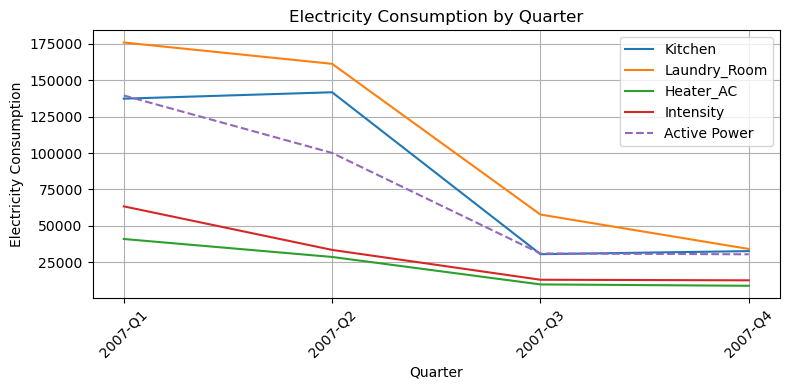

In [26]:
# Plot the line graph
plt.figure(figsize=(8, 4))

# Plot the electricity consumption for kitchen, laundry room, and heater/AC
for column in ['Kitchen', 'Laundry_Room', 'Heater_AC', 'Intensity']:
    plt.plot(quarterly_consumption.index, quarterly_consumption[column], label=column)

# Plot the active power
plt.plot(quarterly_consumption.index, quarterly_consumption['Active_Power'], label='Active Power', linestyle='--')

plt.title('Electricity Consumption by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

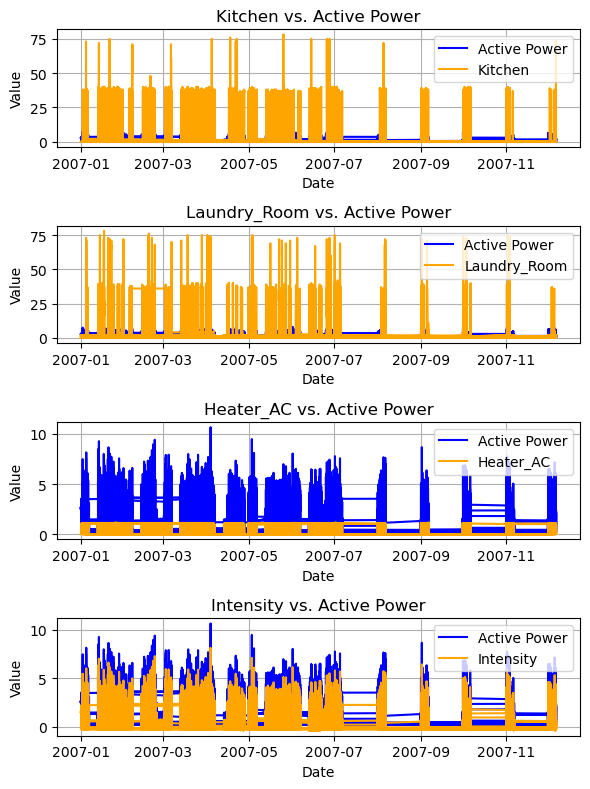

In [27]:
# Plotting each household part against Active Power
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(6, 8))

household_parts = ['Kitchen', 'Laundry_Room', 'Heater_AC', 'Intensity']

for idx, part in enumerate(household_parts):
    ax = axes[idx]
    ax.plot(df['Date'], df['Active_Power'], label='Active Power', color='blue')
    ax.plot(df['Date'], df[part], label=part, color='orange')
    ax.set_title(f'{part} vs. Active Power')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

## Feature Selection

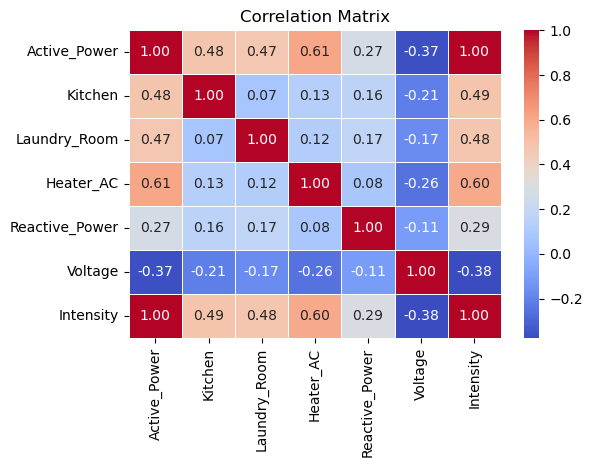

In [25]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

## Modeling

In [48]:
# Prepare the data by Selecting relevant features and Target variable
X = df[['Kitchen', 'Laundry_Room', 'Heater_AC', 'Intensity']]  
y = df['Active_Power']      


In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Polynomial Regression
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
poly_pred = poly_reg.predict(X_test_poly)
poly_rmse = mean_squared_error(y_test, poly_pred, squared=False)
poly_mae = mean_absolute_error(y_test, poly_pred)

print("Polynomial Regression RMSE:", poly_rmse)
print("Mean Absolute Error (Polynomial Regression):", poly_mae)

# Decision Tree
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)
dt_rmse = mean_squared_error(y_test, dt_pred, squared=False)
dt_mae = mean_absolute_error(y_test, dt_pred)
print("Decision Tree RMSE:", dt_rmse)
print("Mean Absolute Error (Decision Tree Regression):", dt_mae)

# KNN
knn_reg = KNeighborsRegressor(n_neighbors=5)  
knn_reg.fit(X_train, y_train)
knn_pred = knn_reg.predict(X_test)
knn_rmse = mean_squared_error(y_test, knn_pred, squared=False)
knn_mae = mean_absolute_error(y_test, knn_pred)
print("KNN RMSE:", knn_rmse)
print("Mean Absolute Error (KNN Regression):", knn_mae)




Polynomial Regression RMSE: 0.04615316894826875
Mean Absolute Error (Polynomial Regression): 0.02959814012940983
Decision Tree RMSE: 0.04074147332420765
Mean Absolute Error (Decision Tree Regression): 0.024579801493954306
KNN RMSE: 0.06851169174730214
Mean Absolute Error (KNN Regression): 0.031124608655616944


## Defining Input and Target Features


In [50]:
# Split the data into features (X) and target variable (y)
X = df[['Kitchen', 'Laundry_Room', 'Heater_AC', 'Intensity']]  
y = df['Active_Power']    

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Scaling

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Cross-Validation

In [53]:

# Create pipelines for each model for cross-validation

# Step 3: Model Training
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)


# Decision Tree
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)


# KNN
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)
y_pred_knn = knn_reg.predict(X_test_scaled)


# Model Evaluation
# Polynomial Regression
X_test_poly = poly.transform(X_test)
y_pred_poly = poly_reg.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae_poly = mean_absolute_error(y_test, y_pred_poly)

# Decision Tree
y_pred_dt = dt_reg.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# KNN
X_test_scaled = scaler.transform(X_test)
y_pred_knn = knn_reg.predict(X_test_scaled)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mae_knn = mean_absolute_error(y_test, y_pred_knn)

cv_rmse_poly = np.sqrt(-cross_val_score(poly_reg, X, y, scoring='neg_mean_squared_error', cv=5))
cv_rmse_dt = np.sqrt(-cross_val_score(dt_reg, X, y, scoring='neg_mean_squared_error', cv=5))
cv_rmse_knn = np.sqrt(-cross_val_score(knn_reg, scaler.transform(X), y, scoring='neg_mean_squared_error', cv=5))

# Print the evaluation metrics
print("Polynomial Regression:")
print("RMSE:", rmse_poly)
print("MAE:", mae_poly)
print("Cross-Validation RMSE:", cv_rmse_poly.mean())

print("\nDecision Tree:")
print("RMSE:", rmse_dt)
print("MAE:", mae_dt)
print("Cross-Validation RMSE:", cv_rmse_dt.mean())

print("\nKNN:")
print("RMSE:", rmse_knn)
print("MAE:", mae_knn)
print("Cross-Validation RMSE:", cv_rmse_knn.mean())


Polynomial Regression:
RMSE: 0.04615316894826875
MAE: 0.02959814012940983
Cross-Validation RMSE: 0.050904779887820106

Decision Tree:
RMSE: 0.04074147332420765
MAE: 0.024579801493954306
Cross-Validation RMSE: 0.044078417857670846

KNN:
RMSE: 0.04614488802248559
MAE: 0.027869682320441985
Cross-Validation RMSE: 0.05639301939468895


## Model Prediction

In [56]:
# Load the trained model from a pickle file
with open('decision_tree_model.pkl', 'rb') as file:
    dt_reg = pickle.load(file)

# Data dictionary for the features
data_dict = {
    'Kitchen': 3,
    'Laundry_Room': 2,
    'Heater_AC': 5,
    'Intensity': 1
}

# Prepare new data for prediction.
new_data = np.array([[data_dict['Kitchen'], data_dict['Laundry_Room'], data_dict['Heater_AC'], data_dict['Intensity']]])

# Make prediction using the loaded model
prediction = dt_reg.predict(new_data)

print("Active_Power:", prediction)


Active_Power: [1.818]


In [26]:
# Load the trained model from a pickle file
with open('decision_tree_model.pkl', 'rb') as file:
    dt_reg = pickle.load(file)

# Data dictionary for the features
data_dict = {
    'Kitchen': 300,
    'Laundry_Room': 200,
    'Heater_AC': 500,
    'Intensity': 100
}

# Prepare new data for prediction
new_data = np.array([[data_dict['Kitchen'], data_dict['Laundry_Room'], data_dict['Heater_AC'], data_dict['Intensity']]])

# Make prediction using the loaded model
prediction = dt_reg.predict(new_data)

print("Active_Power:", prediction)

Active_Power: [10.65]
